**World Happiness Report Data**

####Performing different operations

In [3]:
import pandas as pd
import numpy as np
# show the plots inside the notebook
%matplotlib inline

In [4]:
report = pd.read_csv('/content/drive/MyDrive/dataquest/data-cleaning &Visualization/world_happiness-2015.csv') # read the data set
report.head()


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


###After Data Understanding
Below are descriptions for some of the columns we'll be working with:

Country - Name of the country.

Region - Name of the region the country belongs to.

Happiness Rank - The rank of the country, as determined by its happiness score.

Happiness Score - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.

Family - The estimated extent to which family contributes to the happiness score.

Freedom - The estimated extent to which freedom contributes to the happiness score.

Generosity - The estimated extent to which generosity contributes to the happiness score.

In [5]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

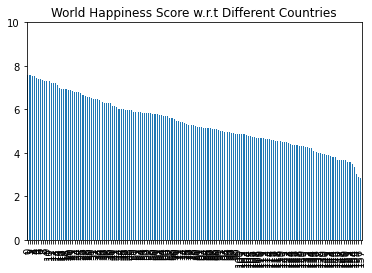

In [6]:
report['Happiness Score'].plot(kind='bar',title='World Happiness Score w.r.t Different Countries',ylim=(0,10))

#####There are so many data points that we can't see any of the values or labels!

#####Each country in the report dataframe is assigned to a region, specified in the Region column.



In [7]:
##Let See the unique regions in dataset
print(report['Region'].unique())
print("<<---------------------------------------------------->>")
print(report['Region'].nunique())#represent no of unique

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']
<<---------------------------------------------------->>
10


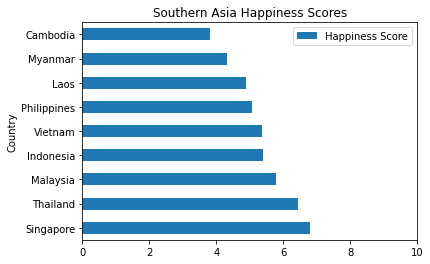

In [8]:
##pparticular area region plotting
asia=report[report['Region']=='Southeastern Asia']
asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

###Task-->Find mean hapiness score for each region.

**Identify each unique group in the data set.**

For each group:

Select only the rows corresponding to that group.

Calculate the average for those rows.

In [9]:
##create the dictionary
word_happiness={}
regions=report['Region'].unique()
#select the corresponding ro belonging to that group
for r in regions:
  region_group=report[report['Region']==r]# only choose the rows where region is r
  region_avg=region_group['Happiness Score'].mean()# calculate the mean
  word_happiness[r]=region_avg# assign to dictionary

word_happiness

{'Australia and New Zealand': 7.285,
 'Central and Eastern Europe': 5.332931034482758,
 'Eastern Asia': 5.626166666666666,
 'Latin America and Caribbean': 6.144681818181818,
 'Middle East and Northern Africa': 5.406899999999999,
 'North America': 7.273,
 'Southeastern Asia': 5.317444444444445,
 'Southern Asia': 4.580857142857143,
 'Sub-Saharan Africa': 4.202800000000001,
 'Western Europe': 6.689619047619048}

In [10]:
import matplotlib.pyplot as plt


<BarContainer object of 10 artists>

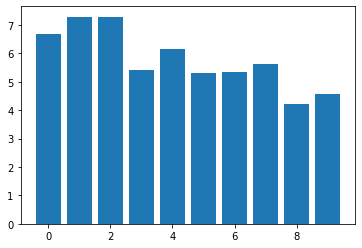

In [11]:
plt.bar(range(len(word_happiness)), list(word_happiness.values()), align='center')

###groupby operation

Split the dataset into categories

Apply some function to each category.

Combine the new results to a dataset

pandas has a built-in operation for this process: The groupby operation performs the "split-apply-combine" process on a dataframe:

Create a Groupby object.

Call a function on the Groupby object.

Let's apply this operation to the previous tasks!

In [12]:
grouping =report.groupby('Region') # group dataset by the "Region" column We do nothing yet!
n1 = grouping.get_group('Australia and New Zealand') # select the data for the Australia and New Zealand group only
n1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


GroupBy.get_group() gives a dataframe containing just the rows for the countries in the Australia and New Zealand.

In [13]:
# take a look on `grouped`
grouping

In [15]:
# you can get more information about the groupby object by using
print(grouping.groups)

{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}


In [16]:
n2 = grouping.get_group('North America')
n2

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [17]:
# another way of above task is 
n_america = report.iloc[[4,14]] # 4 and 14 are indexes indicated above
print(n2 == n_america) # check the similarity between 2 results

    Country  Region  ...  Generosity  Dystopia Residual
4      True    True  ...        True               True
14     True    True  ...        True               True

[2 rows x 12 columns]


In [18]:
##Compute the number of rows for each group.
grouping.size() # The result is a `Series`

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64


Other Methods	Description similar to .size()

.mean()	Calculates the mean of groups.

.sum()	Calculates the sum of group values.

.size()	Calculates the size of the groups.

.count()	Calculates the count of values in groups.

.min()	Calculates the minimum of group values.

.max()	Calculates the maximum of group values.

In [19]:
grouping.mean()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


##### Region appears in a different row than the rest of the column names. It's because that Region in this case is used to be the index of the dataframe.

In [20]:
##Select just the Happiness Score column from grouped and then compute its mean.
happy_grouped = grouping['Happiness Score']
happy_grouped.mean()


Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [21]:
# another way
grouping.mean()['Happiness Score']

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

####we wanted to apply more than one kind of aggregation to a column at a time (e.g. apply both mean() and max())?

Use GroupBy.agg() method.



In [22]:
# happy_grouped = grouped['Happiness Score']
happy_mean_max = happy_grouped.agg([np.mean, np.max])
happy_mean_max

,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


####Because np.max is an alias for np.amax, the corresponding column'name is amax.

In [23]:
##I can define a custom function and then apply `.agg`
def max_diff(group):
  return (group.max()-group.mean())
mean_max_diff=happy_grouped.agg(max_diff)
mean_max_diff


Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

In [25]:
mean_max_dif = report.groupby('Region')['Happiness Score'].agg(max_diff)#after groupby region beahve as inex and happiness 
#score is working as their respective  happiness score for the function we have used
type(mean_max_dif)
mean_max_dif

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

####.pivot_table() method

index and values are actually arguments used in another method used to aggregate data - the DataFrame.pivot_table() method. We can perform the same result as in GroupBy.

In [26]:
# use GroupBy
report.groupby('Region')['Happiness Score'].mean()
# Type: Series

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [27]:
# use pivot_table
report.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)
# type: DataFrame


,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


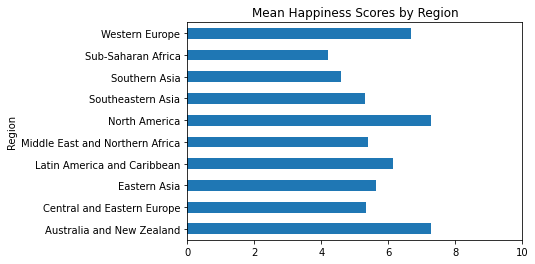

In [28]:
# we can apply normal dataframe filter to the above result
pv_happiness = report.pivot_table('Happiness Score', 'Region') 
# there is no 'aggfunc' because its default value is 'mean'
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

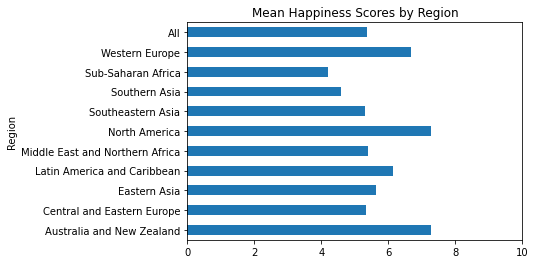

In [30]:
# plot the "All" group with option `margins=True`
pv_happiness = report.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', xlim=(0,10), title='Mean Happiness Scores by Region', legend=False)

In [31]:
##All is the mean of the Happiness Score column. It is:
report['Happiness Score'].mean() # value of `All` bar


5.3757341772151905

In [32]:
#We can aggregate multiple columns and apply multiple functions at once.

#like  we aggregate both the 'Happiness Score' and 'Family' columns in report and group by the 'Region' column:
report.pivot_table(['Happiness Score', 'Family'], 'Region')

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


In [34]:
#apply list of functions
report.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)

,mean,amin,amax
,Happiness Score,Happiness Score,Happiness Score
Region,,,
Australia and New Zealand,7.285000,7.284,7.286
Central and Eastern Europe,5.332931,4.218,6.505
Eastern Asia,5.626167,4.874,6.298
Latin America and Caribbean,6.144682,4.518,7.226
Middle East and Northern Africa,5.406900,3.006,7.278
North America,7.273000,7.119,7.427
Southeastern Asia,5.317444,3.819,6.798
Southern Asia,4.580857,3.575,5.253


In [35]:
#apply list of functions
report.pivot_table(['Happiness Score','Family'] ,'Region', aggfunc=[np.mean, np.min , np.max], margins=True)

mean  ...            amax
                                   Family  ... Happiness Score
Region                                     ...                
Australia and New Zealand        1.314450  ...           7.286
Central and Eastern Europe       1.053042  ...           6.505
Eastern Asia                     1.099427  ...           6.298
Latin America and Caribbean      1.104720  ...           7.226
Middle East and Northern Africa  0.920490  ...           7.278
North America                    1.284860  ...           7.427
Southeastern Asia                0.940468  ...           6.798
Southern Asia                    0.645321  ...           5.253
Sub-Saharan Africa               0.809085  ...           5.477
Western Europe                   1.247302  ...           7.587
All                              0.991046  ...           7.587

[11 rows x 6 columns]

In [39]:
# compare groupby and and  using pivot_table
grouped = report.groupby('Region')[['Happiness Score','Family']]
gb_happy_family_stats = grouped.agg([np.min, np.max, np.mean])
pv_happy_family_stats = report.pivot_table(['Happiness Score', 'Family'], 'Region', 
                                                  aggfunc=[np.min, np.max, np.mean], margins=True)

In [41]:
gb_happy_family_stats

Happiness Score         ...   Family          
                                           amin   amax  ...     amax      mean
Region                                                  ...                   
Australia and New Zealand                 7.284  7.286  ...  1.31967  1.314450
Central and Eastern Europe                4.218  6.505  ...  1.34043  1.053042
Eastern Asia                              4.874  6.298  ...  1.30060  1.099427
Latin America and Caribbean               4.518  7.226  ...  1.30477  1.104720
Middle East and Northern Africa           3.006  7.278  ...  1.22393  0.920490
North America                             7.119  7.427  ...  1.32261  1.284860
Southeastern Asia                         3.819  6.798  ...  1.26504  0.940468
Southern Asia                             3.575  5.253  ...  1.10395  0.645321
Sub-Saharan Africa                        2.839  5.477  ...  1.18468  0.809085
Western Europe                            4.857  7.587  ...  1.40223  1.247302

[10 rows x 6 columns]

In [42]:
pv_happy_family_stats

amin  ...            mean
                                  Family  ... Happiness Score
Region                                    ...                
Australia and New Zealand        1.30923  ...        7.285000
Central and Eastern Europe       0.38562  ...        5.332931
Eastern Asia                     0.94675  ...        5.626167
Latin America and Caribbean      0.74302  ...        6.144682
Middle East and Northern Africa  0.47489  ...        5.406900
North America                    1.24711  ...        7.273000
Southeastern Asia                0.62736  ...        5.317444
Southern Asia                    0.30285  ...        4.580857
Sub-Saharan Africa               0.00000  ...        4.202800
Western Europe                   0.89318  ...        6.689619
All                              0.00000  ...        5.375734

[11 rows x 6 columns]